In [210]:
!pip install together
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ["TOGETHER_API_KEY"] = "f92beca4df59af2b0bd5f0c8fd60c5e3690f01e008fd834fd2e471310862167b"

import pandas as pd
from datasets import load_dataset
import re
import numpy as np
import torch
import matplotlib.pyplot as plt



In [211]:
#df = pd.read_csv("results_prompt_2.csv")
#df = pd.read_csv("comparison_output.csv")
df = pd.read_csv("results2.csv")
print(df.head())
print(len(df))


   Text Source                                       q0_reasoning q0_yes_no  \
0     0  human  The story effectively compresses a thousand ye...       yes   
1     1  llama  The story effectively compresses time during t...       yes   
2     2  human  The story effectively uses time compression du...       yes   
3     3  llama  The story effectively compresses time to build...       yes   
4     4  human  The story effectively compresses time to focus...       yes   

                                        q1_reasoning q1_yes_no  \
0  The story balances detailed scenes, such as th...       yes   
1  The story skillfully alternates between detail...       yes   
2  The story skillfully balances detailed scenes,...       yes   
3  The story skillfully balances detailed scenes,...       yes   
4  The story primarily relies on scenes to convey...       yes   

                                        q2_reasoning q2_yes_no  \
0  The story uses metaphors like the "cold, burni...       yes

In [212]:
#Counts the number of yeses in each row
df['num_of_yes'] = 0
for i in range(0, 27):
    column_name = f'q{i}_yes_no'
    #If any df[column_name] value is None, delete the row
    #This is only the case if the LLM did not follow instruction
    if df[column_name].isnull().values.any():
        df = df.drop(df[df[column_name].isnull()].index)
    df['num_of_yes'] += df[column_name].apply(lambda x: 1 if x == 'yes' else 0)
df['score'] = df['num_of_yes'] / 28

#Save the df out
#df.to_csv("comparison_output2.csv", index=False)


In [213]:
print("Average with reasoning. Humans first, AI second")
print(df['num_of_yes'][0:20:2].mean())
print(df['num_of_yes'][1:20:2].mean())

print("Average without reasoning")
print(df['num_of_yes'][20::2].mean())
print(df['num_of_yes'][21::2].mean())


print("Average across all stories")
print(df['num_of_yes'][::2].mean())
print(df['num_of_yes'][1::2].mean())

print()

Average with reasoning. Humans first, AI second
17.8
16.0
Average without reasoning
21.215384615384615
19.265625
Average across all stories
20.76
18.824324324324323



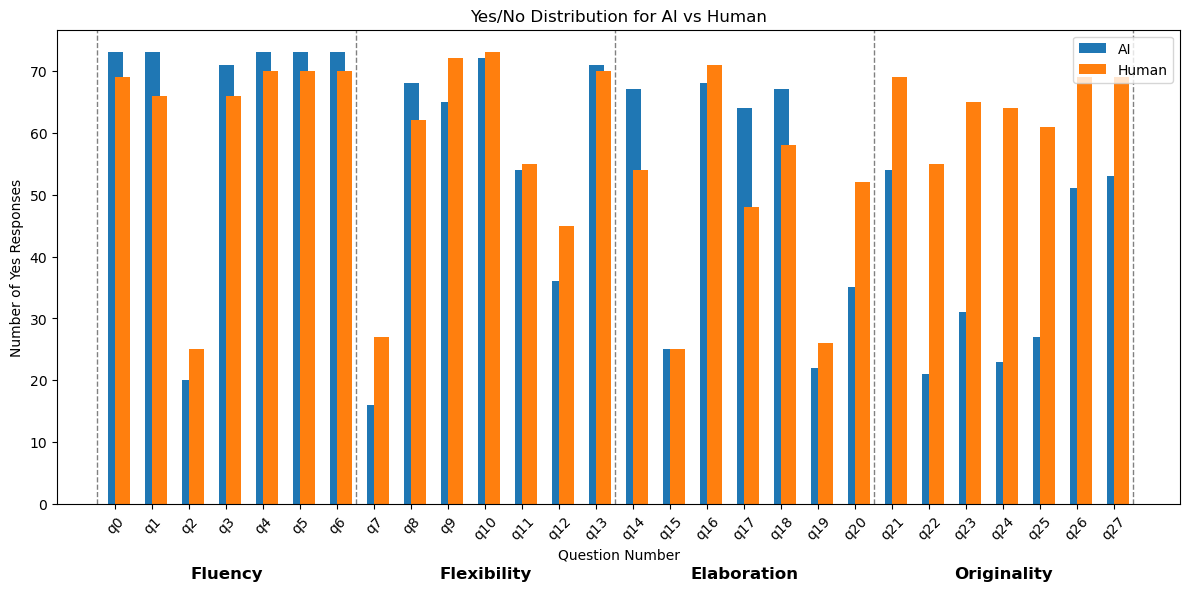

In [214]:

# Getting each question's columns
q_columns = [col for col in df.columns if col.startswith('q') and col.endswith('_yes_no')]

# Rename columns to display just the question numbers
renamed_columns = {col: col.split('_')[0] for col in q_columns}
df_renamed = df.rename(columns=renamed_columns)

# Separate AI and human responses into two groups
ai_responses = df_renamed.iloc[1::2][list(renamed_columns.values())]  # Odd rows
human_responses = df_renamed.iloc[0::2][list(renamed_columns.values())]  # Even rows

# Count the number of "yes" responses for each question
ai_yes_counts = ai_responses.apply(lambda x: (x == 'yes').sum())
human_yes_counts = human_responses.apply(lambda x: (x == 'yes').sum())

# Create a histogram
fig, ax = plt.subplots(figsize=(12, 6))

# Plot AI responses
ax.bar(ai_yes_counts.index, ai_yes_counts.values, width=0.4, label='AI', align='center')
# Plot human responses
ax.bar(human_yes_counts.index, human_yes_counts.values, width=0.4, label='Human', align='edge')

# Add labels for different sections
section_labels = ['Fluency', 'Flexibility', 'Elaboration', 'Originality']
section_positions = [3, 10, 17, 24]  # Midpoints of the sections
section_boundaries = [0, 7, 14, 21, 28]  # Boundaries of the sections

for label, pos in zip(section_labels, section_positions):
    ax.text(pos, -10, label, ha='center', va='top', fontsize=12, color='black', fontweight='bold')

# Add vertical lines to demarcate sections
for boundary in section_boundaries:
    ax.axvline(x=boundary - 0.5, color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Question Number')
ax.set_ylabel('Number of Yes Responses')
ax.set_title('Yes/No Distribution for AI vs Human')
ax.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [215]:
# load in the dataset
df_llm = pd.read_csv("comparison_output2.csv")
df_dj = pd.read_csv("comparison_output_dj.csv")

print(df_llm['score'].head())
print(df_dj['Creativity Score'].head())
correlation = df_llm['score'].corr(df_dj['Creativity Score'])
print(correlation)


0    0.285714
1    0.178571
2    0.250000
3    0.214286
4    0.142857
Name: score, dtype: float64
0    0.482143
1    0.234234
2    0.482456
3    0.267717
4    0.396396
Name: Creativity Score, dtype: float64
0.2002304945996325
